In [1]:
import pandas as pd
from pandas import Series,DataFrame

"""
IMPORTANT NOTE: If parsing Excel files fails, pip install xlrd AND openpyxl
"""

# Open the excel file as an object
cdc_file = pd.ExcelFile('cdc.xlsx')
# Parse the first sheet of the excel file and set as DataFrame
fluo14 = cdc_file.parse('2014')
fluo14.set_index('State')
fluo14['%'] = fluo14['%'].apply(lambda val: val.replace('%', ''))
fluo14['%'] = pd.to_numeric(fluo14['%'])  # convert_objects is deprecated
fluo14 = fluo14.rename(columns={'%': 'Rate receiving fluoridated water'})


# BLS dataset for labor participation
bls_file = pd.ExcelFile('staadata.xlsx')
# Parse the first sheet of the excel file and set as DataFrame
header = ['FIPS Code', 'State and area', 'Year', 'Civilian non-institutional population',
           'Civilian labor force Total', 'CLF Percent of population', 'CLF Employment Total',
           'CLF Employment Percent of population', 'CLF Unemployment Total',
           'CLF Unemployment Rate'
          ]
bls = bls_file.parse('Sheet1', skiprows=7, names=header)
bls14 = bls[bls.Year == 2014]
bls14 = bls14[['State and area','CLF Employment Percent of population','CLF Unemployment Rate']]
bls14['CLF Employment Percent of population'] = pd.to_numeric(bls14['CLF Employment Percent of population'])
bls14['CLF Unemployment Rate'] = pd.to_numeric(bls14['CLF Unemployment Rate'])
bls14.set_index('State and area')

data14 = pd.merge(fluo14, bls14, left_on="State", right_on="State and area")

# get 2002 to calculate change
fluo02 = cdc_file.parse('2002')
fluo02.set_index('State')
fluo02 = fluo02.rename(columns={'%': 'Rate receiving fluoridated water'})

bls02 = bls[bls.Year == 2002]
bls02 = bls02[['State and area','CLF Employment Percent of population','CLF Unemployment Rate']]
bls02['CLF Employment Percent of population'] = pd.to_numeric(bls02['CLF Employment Percent of population'])
bls02['CLF Unemployment Rate'] = pd.to_numeric(bls02['CLF Unemployment Rate'])
bls02.set_index('State and area')

data02 = pd.merge(fluo02, bls02, left_on="State", right_on="State and area")

# merge 2002 and 2014 data
data02.set_index('State')
data14.set_index('State')
data = pd.merge(data02, data14, on='State', suffixes=['_2002', '_2014'])

In [2]:
# CDC and BLS data
data.set_index('State')
data.head()

,State,Rate receiving fluoridated water_2002,Persons receiving fluoridated water_2002,Persons served by CWS,State and area_2002,CLF Employment Percent of population_2002,CLF Unemployment Rate_2002,Persons receiving fluoridated water_2014,Persons served by CWS,Rate receiving fluoridated water_2014,Rank,State and area_2014,CLF Employment Percent of population_2014,CLF Unemployment Rate_2014
0,Alabama,84.6,3786843,4477571,Alabama,58.2,5.9,3812180,4849377,78.6,23.0,Alabama,53.2,6.8
1,Alaska,57.3,296559,517262,Alaska,66.9,7.3,339415,685165,49.5,43.0,Alaska,63.1,6.9
2,Arizona,55.4,2737028,4944156,Arizona,61.9,6.1,3199068,5536324,57.8,38.0,Arizona,55.7,6.8
3,Arkansas,62.4,1516246,2430114,Arkansas,58.5,5.5,1986099,2809741,70.7,31.0,Arkansas,53.6,6.1
4,California,27.7,9052872,32736317,California,62.2,6.7,24699693,38802500,63.7,35.0,California,57.7,7.5


In [3]:
# create two new variables to show changes
data['deltaFluoridation'] = data['Rate receiving fluoridated water_2014'] - data['Rate receiving fluoridated water_2002']
data['deltaLaborParticipation'] = data['CLF Employment Percent of population_2014'] - data['CLF Employment Percent of population_2002']
# see new variables added on the right of the dataframe
data.head()

,State,Rate receiving fluoridated water_2002,Persons receiving fluoridated water_2002,Persons served by CWS,State and area_2002,CLF Employment Percent of population_2002,CLF Unemployment Rate_2002,Persons receiving fluoridated water_2014,Persons served by CWS,Rate receiving fluoridated water_2014,Rank,State and area_2014,CLF Employment Percent of population_2014,CLF Unemployment Rate_2014,deltaFluoridation,deltaLaborParticipation
0,Alabama,84.6,3786843,4477571,Alabama,58.2,5.9,3812180,4849377,78.6,23.0,Alabama,53.2,6.8,-6.0,-5.0
1,Alaska,57.3,296559,517262,Alaska,66.9,7.3,339415,685165,49.5,43.0,Alaska,63.1,6.9,-7.8,-3.8
2,Arizona,55.4,2737028,4944156,Arizona,61.9,6.1,3199068,5536324,57.8,38.0,Arizona,55.7,6.8,2.4,-6.2
3,Arkansas,62.4,1516246,2430114,Arkansas,58.5,5.5,1986099,2809741,70.7,31.0,Arkansas,53.6,6.1,8.3,-4.9
4,California,27.7,9052872,32736317,California,62.2,6.7,24699693,38802500,63.7,35.0,California,57.7,7.5,36.0,-4.5


In [4]:
# show some frequency distributions/tables to get the credits
# CLF = Civilian Labor Force
data['CLF Employment Percent of population_2002'].value_counts(sort=False, bins=5)

52.6813     1
56.4400     8
60.1800    19
63.9200    13
67.6600    10
Name: CLF Employment Percent of population_2002, dtype: int64

In [5]:
data['CLF Employment Percent of population_2014'].value_counts(sort=False, bins=5)

49.679     5
53.900    13
58.100    17
62.300    11
66.500     5
Name: CLF Employment Percent of population_2014, dtype: int64

In [6]:
# on average, labor participation rate is down
print(data.deltaLaborParticipation.mean())

-3.6411764705882357


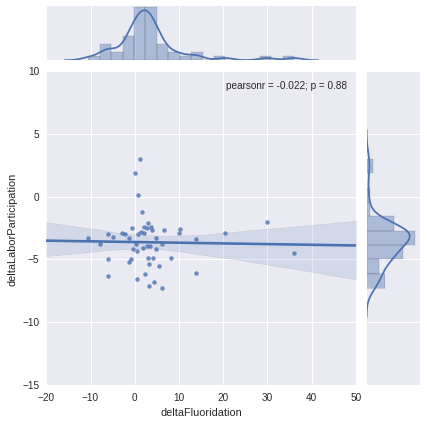

In [7]:
# but change in water fluoridation is not a statistically significant factor
import seaborn as sns
fluoridation = data['deltaFluoridation']
labor_participation = data['deltaLaborParticipation']
%matplotlib inline
sns_plot = sns.jointplot(fluoridation, labor_participation, kind="reg")